In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/cxldata/datasets/project/demand_sales_orders_2014_15.csv')

In [3]:
df.head()

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty
0,11217,2014/01/03 00:00,SO76869,1,771,2039.994,1
1,11217,2014/01/03 00:00,SO297124,1,996,72.894,3
2,11217,2014/01/03 00:00,SO485914,1,957,1430.442,4
3,11217,2014/01/03 00:00,SO76869,1,771,2039.994,1
4,11217,2014/01/03 00:00,SO485914,1,885,602.346,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270817 entries, 0 to 270816
Data columns (total 7 columns):
CustomerId          270817 non-null int64
OrderDate           270817 non-null object
SalesOrderNumber    270817 non-null object
TerritoryID         270817 non-null int64
ProductID           270817 non-null int64
UnitPrice           270817 non-null float64
OrderQty            270817 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
df['year'] = pd.DatetimeIndex(df['OrderDate']).year

In [6]:
df['month'] = pd.DatetimeIndex(df['OrderDate']).month

In [7]:
df['DayofWeek'] = pd.DatetimeIndex(df['OrderDate']).dayofweek

In [8]:
df['weekofyear'] = pd.DatetimeIndex(df['OrderDate']).week

In [9]:
import holidays as hdays
from datetime import time,datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [10]:
cal = calendar()
holidays = cal.holidays(start=df['OrderDate'].min(), end=df['OrderDate'].max())
df['Holiday'] = df['OrderDate'].isin(holidays)

In [11]:
df.head()

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,DayofWeek,weekofyear,Holiday
0,11217,2014/01/03 00:00,SO76869,1,771,2039.994,1,2014,1,4,1,False
1,11217,2014/01/03 00:00,SO297124,1,996,72.894,3,2014,1,4,1,False
2,11217,2014/01/03 00:00,SO485914,1,957,1430.442,4,2014,1,4,1,False
3,11217,2014/01/03 00:00,SO76869,1,771,2039.994,1,2014,1,4,1,False
4,11217,2014/01/03 00:00,SO485914,1,885,602.346,2,2014,1,4,1,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270817 entries, 0 to 270816
Data columns (total 12 columns):
CustomerId          270817 non-null int64
OrderDate           270817 non-null object
SalesOrderNumber    270817 non-null object
TerritoryID         270817 non-null int64
ProductID           270817 non-null int64
UnitPrice           270817 non-null float64
OrderQty            270817 non-null int64
year                270817 non-null int64
month               270817 non-null int64
DayofWeek           270817 non-null int64
weekofyear          270817 non-null int64
Holiday             270817 non-null bool
dtypes: bool(1), float64(1), int64(8), object(2)
memory usage: 23.0+ MB


In [13]:
df['OrderDate']= pd.to_datetime(df['OrderDate'])
df.head()

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,DayofWeek,weekofyear,Holiday
0,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,1,4,1,False
1,11217,2014-01-03,SO297124,1,996,72.894,3,2014,1,4,1,False
2,11217,2014-01-03,SO485914,1,957,1430.442,4,2014,1,4,1,False
3,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,1,4,1,False
4,11217,2014-01-03,SO485914,1,885,602.346,2,2014,1,4,1,False


/usr/local/anaconda/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74de72cc88>,
      dtype=object)

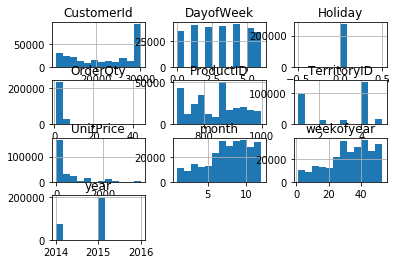

In [14]:
df.hist(bins =12)

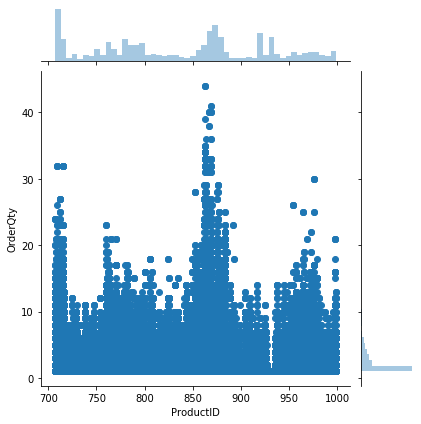

In [15]:
compare = sns.jointplot(x='ProductID',y='OrderQty',data=df)

In [25]:
x = df.drop(['OrderDate','SalesOrderNumber','OrderQty'], axis =1)
y = df['OrderQty']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(len(X_train),len(X_test))

181447 89370


In [46]:
y_train[0]

1

In [32]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [56]:
from sklearn import linear_model

In [57]:
lm = linear_model.LinearRegression()

In [58]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
prediction = lm.predict(X_test)

In [103]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
print(metrics.mean_squared_error(y_test,prediction))

6.701153408538312


In [62]:
print(np.sqrt(metrics.mean_squared_error(y_test,prediction)))

2.5886586118177717


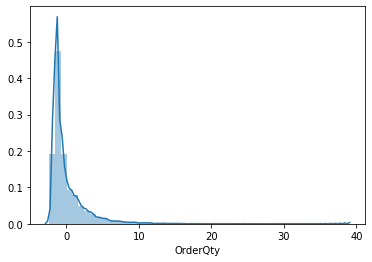

In [109]:
sns.distplot(y_test-prediction)

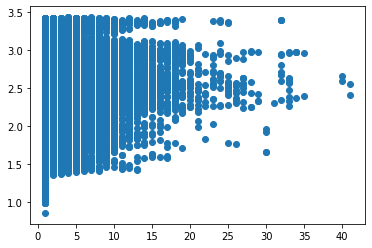

In [111]:
plt.scatter(y_test,prediction)
plt.show()

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtree = DecisionTreeClassifier(max_depth =50)

In [80]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
y_train_predict = dtree.predict(X_train)

In [88]:
pred = dtree.predict(X_test)

In [82]:
y_train[0]

1

In [83]:
y_train_predict[0]

1

In [102]:
confusion_matrix(y_train,y_train_predict)

array([[103509,     23,     25, ...,      0,      0,      0],
       [   189,  23076,     16, ...,      0,      0,      0],
       [   117,    131,  16715, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ...,      1,      0,      0],
       [     0,      0,      0, ...,      0,      4,      0],
       [     0,      0,      0, ...,      0,      0,      3]])

In [96]:
accuracy = accuracy_score(y_train,y_train_predict)

In [97]:
print(accuracy)

0.9911599530441396


In [104]:
test_accuracy = accuracy_score(y_test,pred)

In [93]:
pred[0]

1

In [101]:
confusion_matrix(y_test,pred)

array([[44611,  2351,  1604, ...,     0,     0,     0],
       [ 2513,  4446,  1571, ...,     0,     0,     0],
       [ 1685,  1574,  2788, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

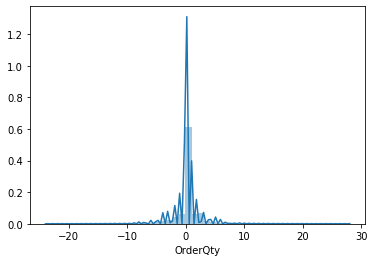

In [106]:
sns.distplot(y_test-pred)

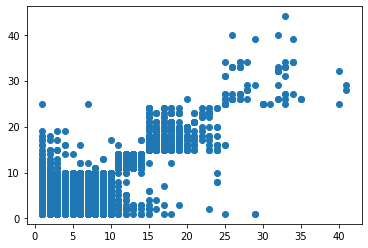

In [108]:
plt.scatter(y_test,pred)
plt.show()